In [1]:
%matplotlib inline
import qiskit
from qiskit import *
from qiskit_aer import AerSimulator
import matplotlib.pyplot

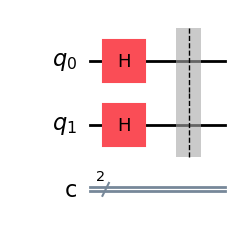

In [2]:
qc=QuantumCircuit(2,2)
qc.h([0,1])
qc.barrier()
qc.draw("mpl")

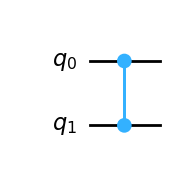

In [3]:
# oracle
oracle=QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw("mpl")

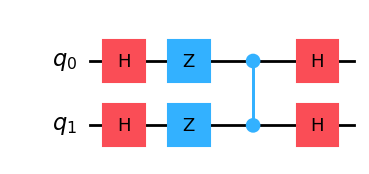

In [4]:
# reflection circuit
reflection=QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw("mpl")

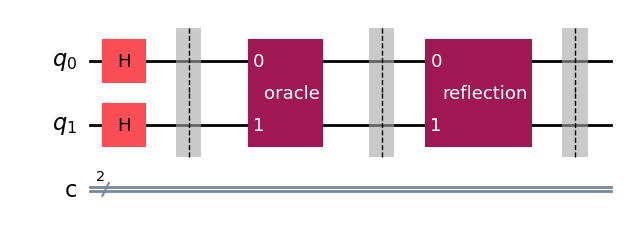

In [5]:
# combining the circuit
qc.append(oracle,[0,1])
qc.barrier()
qc.append(reflection,[0,1])
qc.barrier()
qc.draw('mpl')

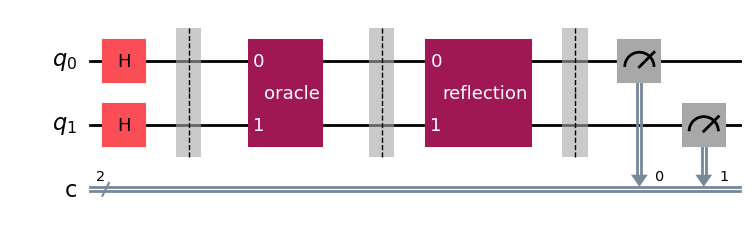

In [6]:
qc.measure([0,1],[0,1])
qc.draw("mpl")

In [7]:
backend=AerSimulator(method='automatic')
circuit=transpile(qc,backend)
out=backend.run(circuit,shots=1).result()

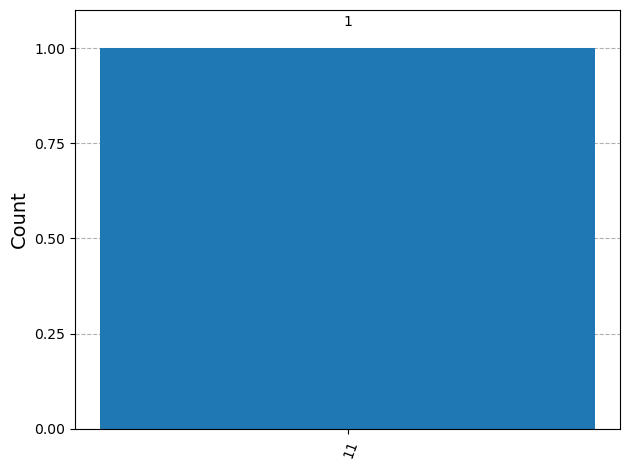

In [8]:
from qiskit.visualization import plot_histogram
count=out.get_counts()
plot_histogram(count)